<a href="https://colab.research.google.com/github/Ajayarul7/TASK-1/blob/main/GRID.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

     TASK-1

     SUPERVISED LEARNING

     TASK : TO PREDICT THE PERCENTAGE OF AN STUDENT BASED ON THE NUMBER OF STUDY  HOURS USING SIMPLE LINEAR REGRESSION

In [ ]:
#IMPORTING NECESSARY LIBRARIES
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn import metrics
import warnings
warnings.filterwarnings("ignore")

In [ ]:
url_link = "http://bit.ly/w-data"
data = pd.read_csv(url_link)

In [ ]:
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [ ]:
data["Hours"].unique()

array([2.5, 5.1, 3.2, 8.5, 3.5, 1.5, 9.2, 5.5, 8.3, 2.7, 7.7, 5.9, 4.5,
       3.3, 1.1, 8.9, 1.9, 6.1, 7.4, 4.8, 3.8, 6.9, 7.8])

In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Hours,25.0,5.012,2.525094,1.1,2.7,4.8,7.4,9.2
Scores,25.0,51.480,25.286887,17.0,30.0,47.0,75.0,95.0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [ ]:
data.columns

Index(['Hours', 'Scores'], dtype='object')

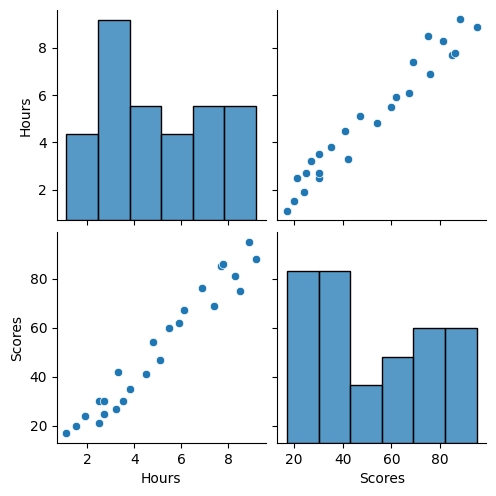

In [ ]:
#EDA

## TO KNOW THE DISTRIBUTION
sns.pairplot(data)

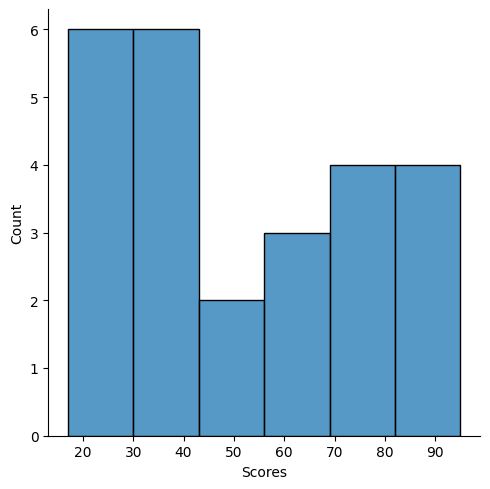

In [ ]:
sns.displot(data["Scores"])

<Axes: >

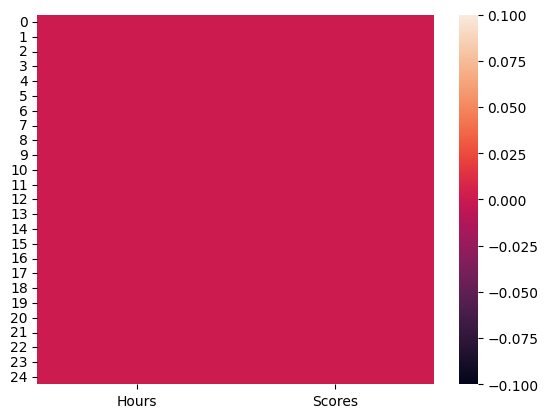

In [ ]:
## TO CHECK THE NULL VALUES
sns.heatmap(data.isnull())

In [ ]:
#DATA PREPROCESSING

In [ ]:
sc = StandardScaler()

In [ ]:
sc.fit(data.drop("Scores",axis = 1))

StandardScaler()

In [ ]:
sc_trans = sc.transform(data.drop("Scores",axis = 1))

In [ ]:
## ASSINGING x AND y VALUES
x = data[["Hours"]]
y = data[["Scores"]]

In [ ]:
## SPLITING DATA FOR TRAINING AND TESTING
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state = 42)

In [ ]:
x_train.head()

,Hours
22,3.8
5,1.5
2,3.2
12,4.5
15,8.9


In [ ]:
# MODEL CREATION

In [ ]:
model = LinearRegression()
model1 = Lasso(alpha = 0.3)
model2 = Ridge(alpha = 0.3)

In [ ]:
model.fit(x_train,y_train)

LinearRegression()

In [ ]:
model1.fit(x_train,y_train)

Lasso(alpha=0.3)

In [ ]:
model2.fit(x_train,y_train)

Ridge(alpha=0.3)

In [ ]:
m = [model,model1,model2]

In [ ]:
## PLOTTING THE GRAPH y=mx+c

line = model.coef_*x + model.intercept_
line1 = model.coef_*x + model1.intercept_
line2 = model.coef_*x + model2.intercept_

In [ ]:
ln = [line,line1,line2]

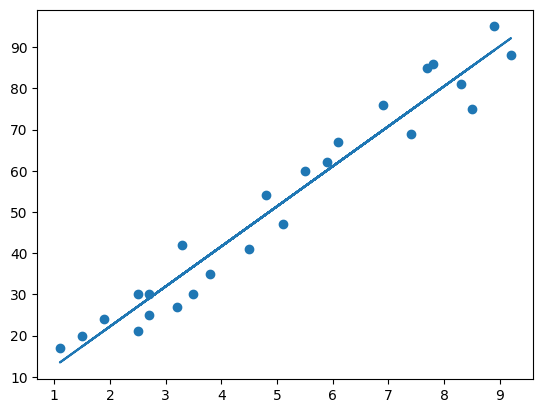

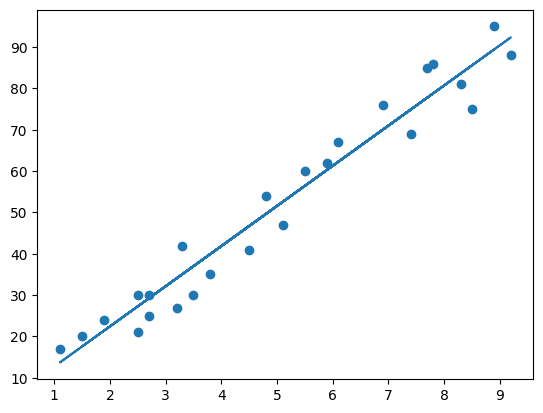

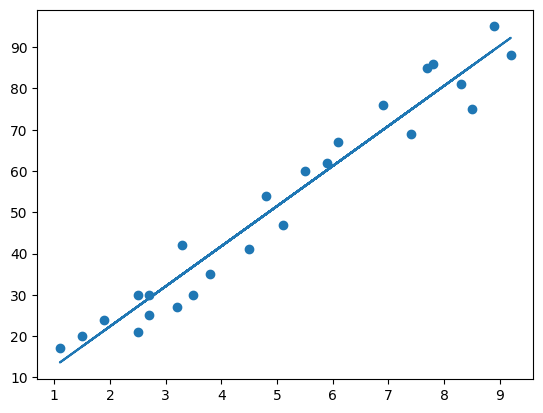

In [ ]:
for i in ln:
  plt.scatter(x,y)
  plt.plot(x,i);
  plt.show()

In [ ]:
## METRIC EVALUATION

In [ ]:
prediction = model.predict(x_test)
#RSME(Root Measured Square Error)
print("RSME = ",np.sqrt(metrics.mean_squared_error(y_test,prediction)))

RSME =  4.859985351228103


In [ ]:
#Metric Evaluation
for i in m:
  print(i.score(x_test,y_test))

0.9487647340257012
0.9485098608466433
0.9486242749661843


In [ ]:
##PREDICTION

In [ ]:
time = 9.25
time1 = np.asarray(time)
reshape = time1.reshape(-1,1)

prediction1 = model.predict(reshape)
print("Hours of Study = ", time)
print("Predictive Score = ",prediction1[0])

Hours of Study =  9.25
Predictive Score =  [92.61670034]


        If the Study for 9.25 Hours Probably He Might Have Score 92.6 Marks.